<a href="https://colab.research.google.com/github/mostafa-ja/Data-Mining-fall-2023/blob/main/Data_Mining2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
import gdown

# our sharable address : https://drive.google.com/file/d/1JFZY6bOua4XvL1t36nNF5hTigotYckIY/view?usp=share_link
# Replace 'your_file_id' with the actual file ID from the shareable link
file_id = '1quMzXrCUCVTHaVTAT26jO-T_HnhSBxtp'

download_link = f'https://drive.google.com/uc?id={file_id}'
output = 'EX_2.zip'
gdown.download(download_link, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1quMzXrCUCVTHaVTAT26jO-T_HnhSBxtp
To: /content/EX_2.zip
100%|██████████| 125M/125M [00:01<00:00, 122MB/s]


'EX_2.zip'

In [3]:
!unzip '/content/EX_2.zip' -d "/content/data/"

Archive:  /content/EX_2.zip
replace /content/data/Answer.rar? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
!unrar x "/content/data/Answer.rar"
!unrar x "/content/data/Q_A.rar"
!unrar x "/content/data/Questions.rar"
!unrar x "/content/data/U.rar"
!unrar x "/content/data/tags.rar"
!unrar x "/content/data/user_badge.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Answer.rar


Would you like to replace the existing file Answer.csv
156755502 bytes, modified on 2017-02-20 12:42
with a new one
156755502 bytes, modified on 2017-02-20 12:42

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Q_A.rar


Would you like to replace the existing file Q_A.csv
63704878 bytes, modified on 2017-02-20 12:51
with a new one
63704878 bytes, modified on 2017-02-20 12:51

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Questions.rar


Would you like to replace the existing file Questions.txt
80129234 bytes, modified on 2017-02-20 12:46
with a new one
80129234 bytes, modified on 2017-02-20 12:46

[Y]es, [N]o, [A]ll

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
answers = pd.read_csv('Answer.csv', encoding="utf-16")
answers = answers.drop(0) # remove the meaningless row(the second line)
answers.head(3)

,Id,CreationDate,Score,OwnerUserId,CommentCount,ClosedDate
1,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN
2,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN
3,133,2008-08-01 16:31:43.430000000,0.0,59.0,1.0,NaN


In [7]:
questions = pd.read_csv('Questions.txt', encoding="utf-16")
questions.head(3)

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13
1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2
2,382,2008-08-02 08:58:28,28,6827,122.0,1,NaN,4


In [8]:
Q_A = pd.read_csv('Q_A.csv', encoding="utf-16")
Q_A.head(3)

,QId,AId,accepted
0,898405,1153025,0
1,12679343,12679433,0
2,19108614,19786664,0


In [9]:
users = pd.read_csv('U.csv', encoding="utf-16")
users.head(3)

,Id,Reputation,Views,UpVotes,DownVotes
0,1,33107,173080,3225,1299
1,3,10145,18988,5654,100
2,9,8716,3152,42,4


In [10]:
user_badge = pd.read_csv('user_badge.txt', encoding="utf-16")
user_badge.head(3)

,UserId,Name
0,3718,Teacher
1,994,Teacher
2,3893,Teacher


In [11]:
tags = pd.read_csv('tags.txt', sep='\t')
tags.head(3)

,Id,Tags
0,2288942,user-interface
1,4433442,canvas
2,6381190,shortcut


In [12]:
len(questions)

810071

# Question 1

In [14]:
merged_Q_A = pd.merge(questions, Q_A, left_on='Id', right_on='QId', how='inner')
merged_Q_A.head(3)

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount,QId,AId,accepted
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,183,1
1,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,53547,0
2,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,16483567,0


In [15]:
# Grouping by 'Id' and checking if 'accepted' has at least one value equal to 1
accepted_flag = merged_Q_A.groupby('Id')['accepted'].any().astype(int)
accepted_flag

Id
123         1
126         1
382         1
564         1
2092        0
           ..
28922872    0
28922876    0
28922893    0
28922910    0
28922922    0
Name: accepted, Length: 810071, dtype: int64

In [16]:
questions['accepted_flag'] = accepted_flag

In [17]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = questions['accepted_flag'].corr(questions['ViewCount'])
correlation

0.020188106238256856

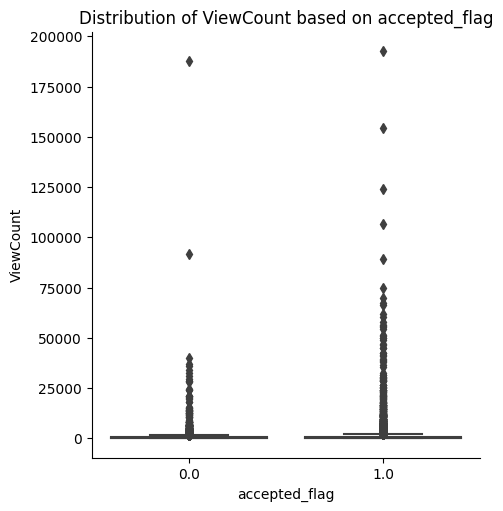

In [18]:
# Using a categorical plot or boxplot to visualize 'ViewCount' based on 'accepted' values
sns.catplot(x='accepted_flag', y='ViewCount', data=questions, kind='box')
plt.title('Distribution of ViewCount based on accepted_flag')
plt.xlabel('accepted_flag')
plt.ylabel('ViewCount')
plt.show()

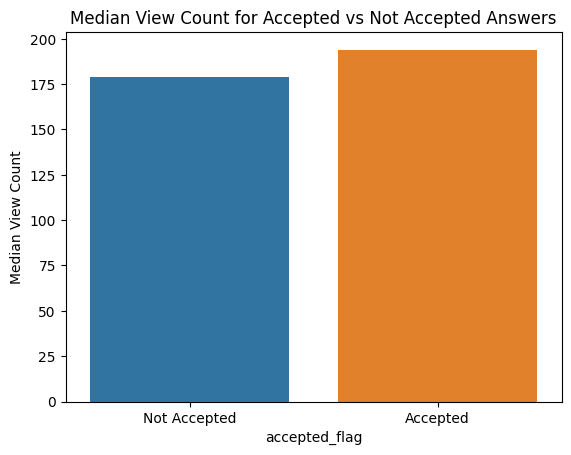

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_Q_A is your DataFrame

# Grouping by 'accepted' and calculating median view count
median_view_count = questions.groupby('accepted_flag')['ViewCount'].median()

# Creating a bar plot for median view count of accepted vs not accepted answers
sns.barplot(x=median_view_count.index.map({1: 'Accepted', 0: 'Not Accepted'}), y=median_view_count.values)
plt.ylabel('Median View Count')
plt.title('Median View Count for Accepted vs Not Accepted Answers')
plt.show()


# Question 2

In [20]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

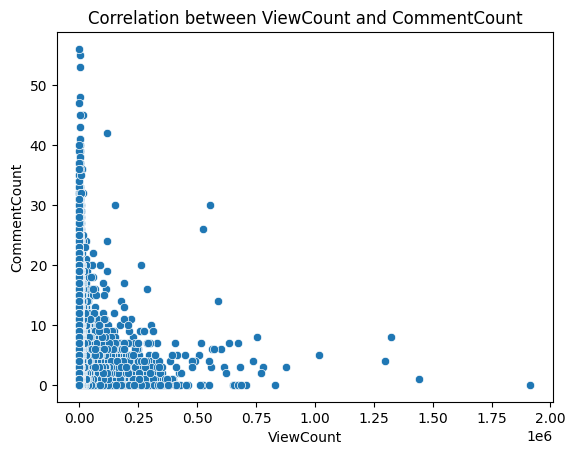

In [21]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='ViewCount', y='CommentCount', data=questions)
plt.title('Correlation between ViewCount and CommentCount')
plt.xlabel('ViewCount')
plt.ylabel('CommentCount')
plt.show()

In [22]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = questions['CommentCount'].corr(questions['ViewCount'])
correlation

-0.007876112266719859

# Question 3

In [23]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [24]:
answers.columns

Index(['Id', 'CreationDate', 'Score', 'OwnerUserId', 'CommentCount',
       'ClosedDate'],
      dtype='object')

In [25]:
merged_A_Q = pd.merge(answers, Q_A, left_on='Id', right_on='AId', how='inner')
merged_A_Q = pd.merge(merged_A_Q, questions, left_on='QId', right_on='Id', how='inner',suffixes=('_A', '_Q'))
merged_A_Q.head()

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,accepted_flag
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
1,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN,126,128,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
2,139,2008-08-01 16:43:30.880000000,5.0,72.0,0.0,NaN,126,139,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
3,142,2008-08-01 16:56:55.830000000,2.0,42.0,0.0,NaN,126,142,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN
4,143,2008-08-01 17:01:27.240000000,3.0,86.0,0.0,NaN,126,143,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2,NaN


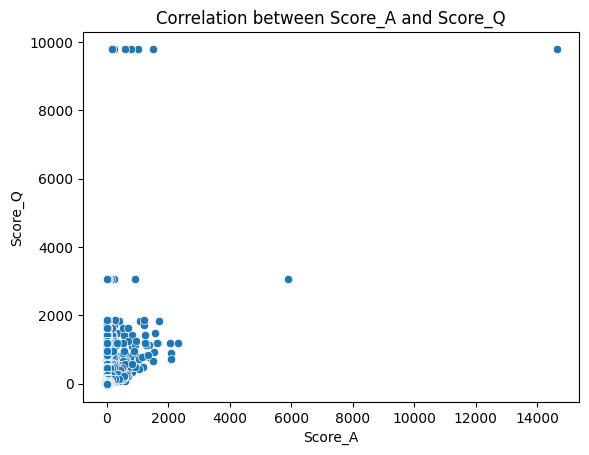

In [26]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='Score_A', y='Score_Q', data=merged_A_Q)
plt.title('Correlation between Score_A and Score_Q')
plt.xlabel('Score_A')
plt.ylabel('Score_Q')
plt.show()

In [27]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = merged_A_Q['Score_A'].corr(merged_A_Q['Score_Q'])
correlation

0.3633855098600879

# Question 4

In [28]:
merged_A_Q.columns

Index(['Id_A', 'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

In [29]:
users.columns

Index(['Id', 'Reputation', 'Views', 'UpVotes', 'DownVotes'], dtype='object')

In [30]:
merged_U_A_Q = pd.merge(users, merged_A_Q, left_on='Id', right_on='OwnerUserId_A', how='inner')
merged_U_A_Q.head()

,Id,Reputation,Views,UpVotes,DownVotes,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,...,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,accepted_flag
0,1,33107,173080,3225,1299,50544,2008-09-08 20:04:18.290000000,37.0,1.0,3.0,...,0,50532,2008-09-08 19:59:45,54,123939,1310.0,0,NaN,8,NaN
1,1,33107,173080,3225,1299,284016,2008-11-12 14:02:14.047000000,3.0,1.0,0.0,...,0,283965,2008-11-12 13:46:22,2,1250,36906.0,0,NaN,0,NaN
2,3,10145,18988,5654,100,293331,2008-11-16 01:21:28.770000000,0.0,3.0,1.0,...,0,292830,2008-11-15 17:54:28,4,342,3305.0,2,NaN,1,NaN
3,9,8716,3152,42,4,35045,2008-08-29 19:02:09.180000000,3.0,9.0,1.0,...,0,35002,2008-08-29 18:47:23,54,14260,1853.0,1,NaN,22,NaN
4,13,116651,18843,4714,187,608,2008-08-03 02:32:50.690000000,16.0,13.0,1.0,...,0,564,2008-08-02 21:47:35,101,84452,25.0,2,NaN,35,NaN


In [31]:
merged_U_A_Q.columns

Index(['Id', 'Reputation', 'Views', 'UpVotes', 'DownVotes', 'Id_A',
       'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'accepted_flag'],
      dtype='object')

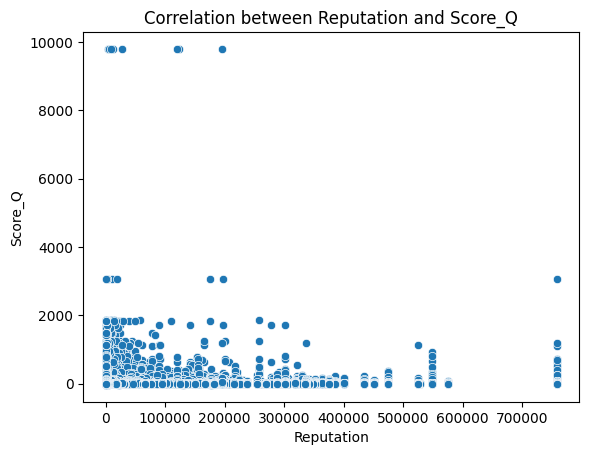

In [59]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='Reputation', y='Score_Q', data=merged_U_A_Q)
plt.title('Correlation between Reputation and Score_Q')
plt.xlabel('Reputation')
plt.ylabel('Score_Q')
plt.show()

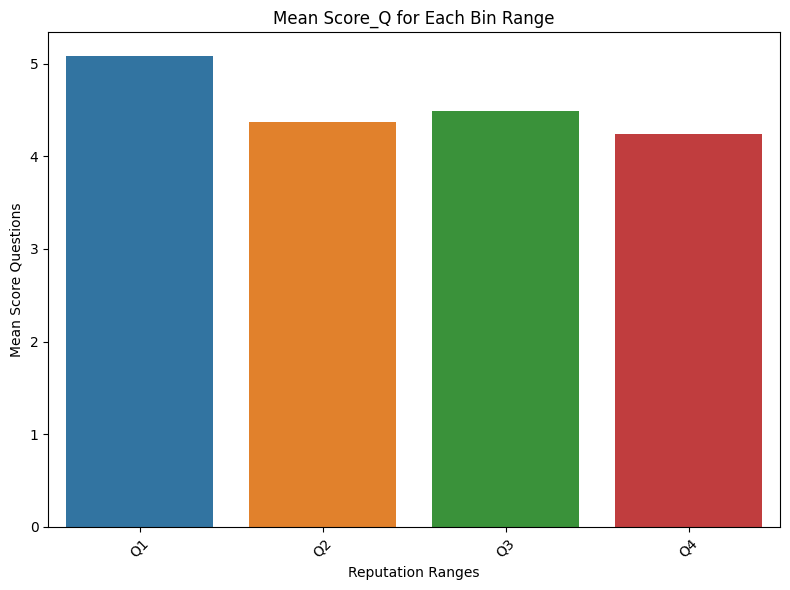

In [58]:
# Define bins and calculate mean scores for each bin
merged_U_A_Q['Bin'] = pd.qcut(merged_U_A_Q['Reputation'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
mean_scores = merged_U_A_Q.groupby('Bin')['Score_Q'].mean()

# Plotting with mean scores on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean Score_Q for Each Bin Range')
plt.xlabel('Reputation Ranges')
plt.ylabel('Mean Score Questions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [60]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = merged_U_A_Q['Reputation'].corr(merged_U_A_Q['Score_Q'])
correlation

-0.001712069985908856

# Question 5

In [65]:
merged_U_A_Q['ClosedDate_Q']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1503482    NaN
1503483    NaN
1503484    NaN
1503485    NaN
1503486    NaN
Name: ClosedDate_Q, Length: 1503487, dtype: object

In [67]:
merged_U_A_Q['Closed_Q'] = merged_U_A_Q['ClosedDate_Q'].notnull().astype(int)
merged_U_A_Q['Closed_Q']

0          0
1          0
2          0
3          0
4          0
          ..
1503482    0
1503483    0
1503484    0
1503485    0
1503486    0
Name: Closed_Q, Length: 1503487, dtype: int64

In [68]:
sum(merged_U_A_Q['Closed_Q'])

105685

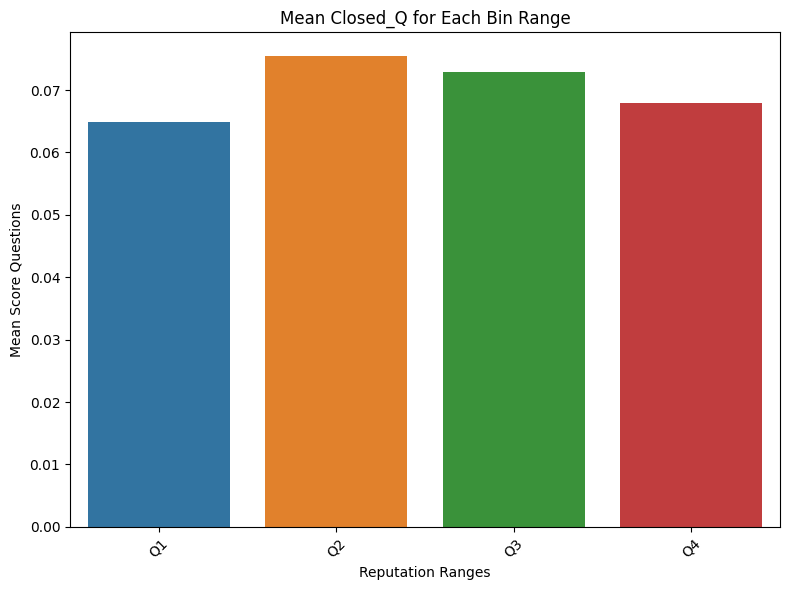

In [69]:
# Define bins and calculate mean scores for each bin
merged_U_A_Q['Bin'] = pd.qcut(merged_U_A_Q['Reputation'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
mean_scores = merged_U_A_Q.groupby('Bin')['Closed_Q'].mean()

# Plotting with mean scores on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean Closed_Q for Each Bin Range')
plt.xlabel('Reputation Ranges')
plt.ylabel('Mean Score Questions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

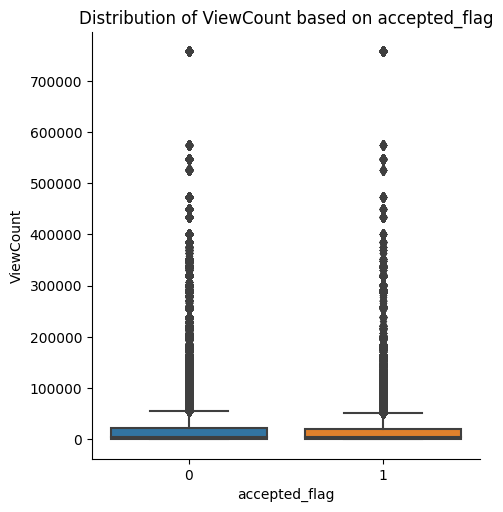

In [73]:
# Using a categorical plot or boxplot to visualize 'ViewCount' based on 'accepted' values
sns.catplot(x='Closed_Q', y='Reputation', data=merged_U_A_Q, kind='box')
plt.title('Distribution of ViewCount based on accepted_flag')
plt.xlabel('accepted_flag')
plt.ylabel('ViewCount')
plt.show()